In [92]:
# Basic Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [93]:
data=pd.read_csv('gld_price_data.csv')

In [94]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [95]:
# SPX= SPX stock value
# GLD= Gold Price
# USO= United State Oil Price
# SLV= Silver Price
# EUR/USD= Currency Pair

In [96]:
data.shape

(2290, 6)

In [97]:
 data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [98]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [99]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [100]:
df=data.drop(columns='Date',axis=1)

<Axes: >

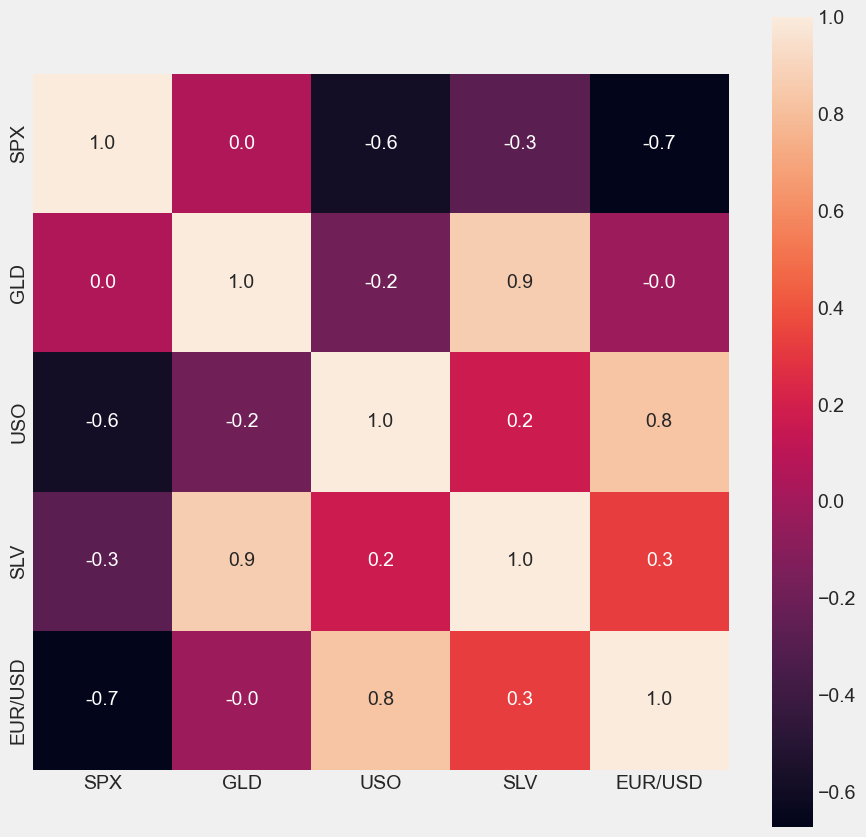

In [101]:
correlation =df.corr()
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True)

In [102]:
 correlation['GLD']


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

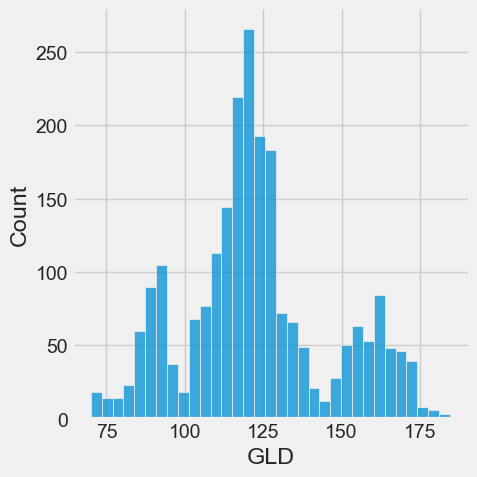

In [103]:
sns.displot(data['GLD'])

In [104]:
x=data.drop(['Date','GLD'],axis=1)

In [105]:
 x.head()


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [107]:
y=data['GLD']


In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [110]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [112]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 7.9021
- Mean Absolute Error: 5.8202
- R2 Score: 0.8825
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.4747
- Mean Absolute Error: 6.3730
- R2 Score: 0.8770


Lasso
Model performance for Training set
- Root Mean Squared Error: 7.9268
- Mean Absolute Error: 5.7628
- R2 Score: 0.8817
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.5105
- Mean Absolute Error: 6.3376
- R2 Score: 0.8760


Ridge
Model performance for Training set
- Root Mean Squared Error: 7.9024
- Mean Absolute Error: 5.8090
- R2 Score: 0.8824
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.4782
- Mean Absolute Error: 6.3652
- R2 Score: 0.8769


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.4342
- Mean Absolute Error: 2.9382
- R2 Score: 0.9630
-----------------------

In [113]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.990163
6,XGBRegressor,0.986001
4,Decision Tree,0.977614
3,K-Neighbors Regressor,0.940776
7,AdaBoost Regressor,0.935304
0,Linear Regression,0.876994
2,Ridge,0.876890
1,Lasso,0.875951


In [117]:
rf_model = RandomForestRegressor()
rf_model = rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.05


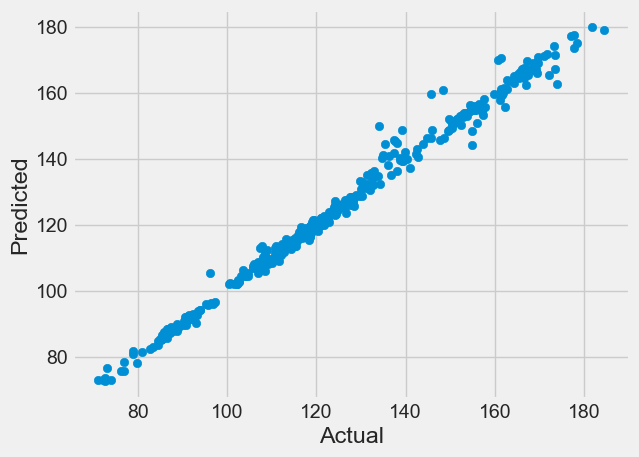

In [118]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

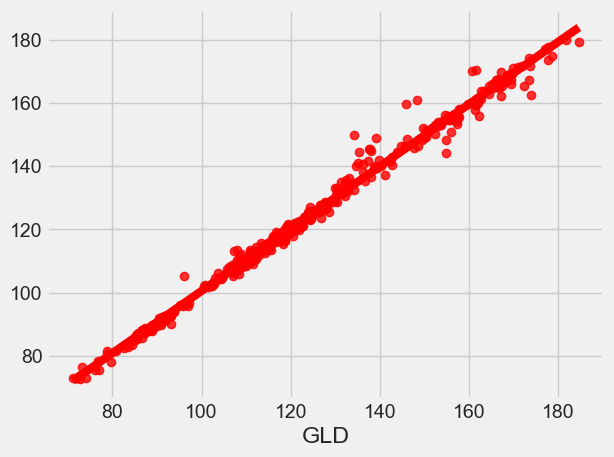

In [119]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [120]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
133,78.889999,80.731098,-1.841099
1304,118.290001,119.035100,-0.745099
976,154.500000,156.293399,-1.793399
1872,126.680000,123.641000,3.039000
1373,126.410004,125.734700,0.675304
...,...,...,...
204,83.459999,82.835998,0.624001
1083,165.770004,166.329700,-0.559696
1533,114.769997,114.142301,0.627696
1115,162.190002,155.777800,6.412202
